# Overview

In this assignemnt, we find the discrete fourier transform of various signals using the $numpy.fft$ module. We also try to approximate the CTFT of a gaussian by taking samples and finding it DFT. We attain the required accuracy by increasing the number of samples and the window size iteratively.

# Code and Generated Outputs
Importing required libraries.

In [1]:
# %matplotlib qt
from pylab import *

## Writing general function to output the transform given any function
The function $transform$ takes the function, the time interval and the number of samples as the input and plots the magnitude and phase plot of the DFT.

In [2]:
def transform(func = sin, T = 8*pi, N = 512, lim = 5, ret = False, c = 1):
    t=linspace(-T/2,T/2,N+1);t=t[:-1]
    y=func(t)
    Y=fftshift(fft(ifftshift(y)))/N
    w=linspace(-N*(pi/T),N*(pi/T),N+1);w=w[:-1]
    figure()
    subplot(2,1,1)
    plot(w,abs(Y),lw=2)
    xlim([-lim,lim])
    ylabel(r"$|Y|$",size=16)
    grid(True)
    subplot(2,1,2)
    ii = where(abs(Y) > 1e-3)
    plot(w,angle(Y),'go',markersize= 3)
    plot(w[ii],angle(Y[ii]),'ro',markersize = 5)
    xlim([-lim,lim])
    ylabel(r"Phase of $Y$",size=16)
    xlabel(r"$\omega$",size=16)
    grid(True)
    show()
    if(ret):
        return Y

## Part 2 - $sin^{3}x$ and $cos^{3}x$
We can write :
$$sin^{3}(t) = \frac{3}{4}sin(t)-\frac{1}{4}sin(3t)$$ 
So, we expect peaks at $\omega=3$ and $\omega=1$ with amplitudes $-0.25$ and $0.75$ respectively. 

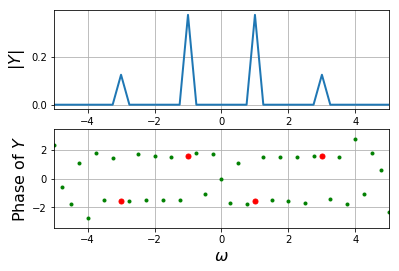

In [3]:
transform(func = lambda x : (sin(x))**3, T = 8*pi, N = 512, lim = 5)

It can be observed that the output is as expected, the magnitude and phase both satisfy the above equation.

We can write :
$$cos^{3}(t) = \frac{3}{4}cos(t)+\frac{1}{4}cos(3t)$$ 
So, we expect peaks at $\omega=3$ and $\omega=1$ with amplitudes $0.25$ and $0.75$ respectively. 

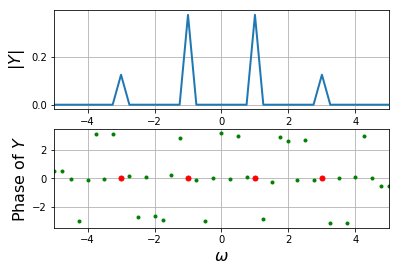

In [ ]:
transform(func = lambda x : (cos(x))**3, lim = 5)

It can be observed that the output is as expected, the magnitude and phase both satisfy the above equation.

## Part 3 - Frequency Modulation
We have,
$$x(t) = cos(20t + 5cos(t))$$

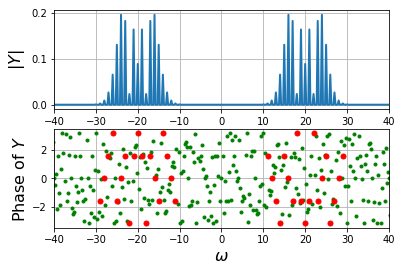

In [ ]:
transform(func = lambda x : cos(20*x + 5*cos(x)), lim = 40)

It is observed that the frequency band contains more number of peaks than the ones considered before and their amplitudes are also comparable. So, the energy is distributed among and the frequencies in the band almost equally.

## Part 4 - Approximating CTFT of Gaussian
We have $$x(t)=e^{-t^{2}/2}$$
The analytical expression of the CTFT can be found as, $$X(e^{j\omega})=\frac{1}{\sqrt{2\pi}}e^{-\omega^{2}/2}$$
Approximating the Fourier integral using Reimman sum, we can write:
$$X(k\Delta\omega)\approx \frac{ \delta t}{2\pi}DFT\{x(n\delta t)\}$$
We start with $N = 128$ and $T = 8\pi$ and keep on increasing $N$ and $T$ by doubling them until we reach the required accuracy  (which is given to be $10^{-6}$).

In [ ]:
def gaussian_transform(x):
    return (1/sqrt(2*pi))*exp((-x**2)/2)

For N = 128 and T = 25.132741228718345


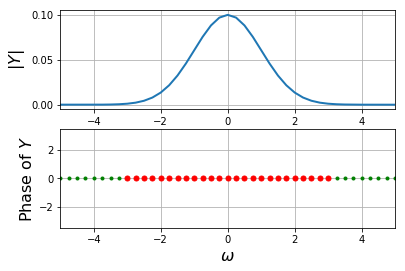

For N = 256 and T = 50.26548245743669


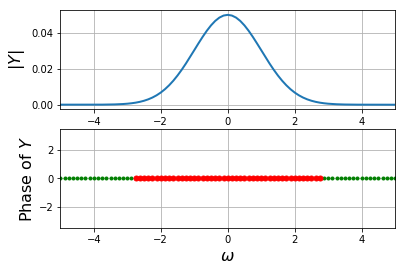

For N = 512 and T = 100.53096491487338


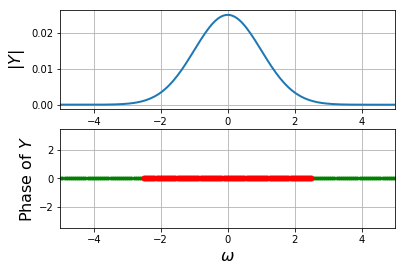

For N = 1024 and T = 201.06192982974676


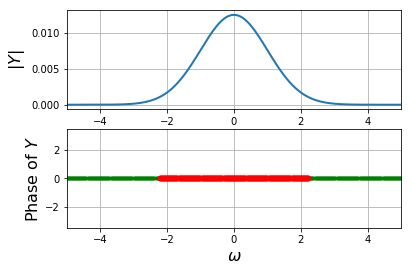

For N = 2048 and T = 402.1238596594935


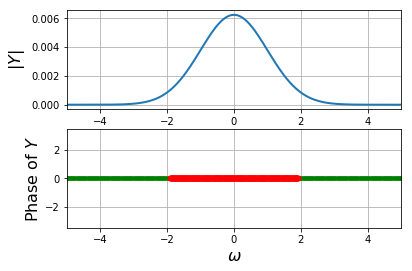

For N = 4096 and T = 804.247719318987


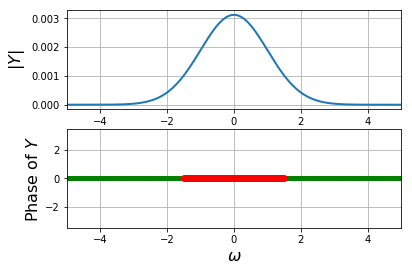

For N = 8192 and T = 1608.495438637974


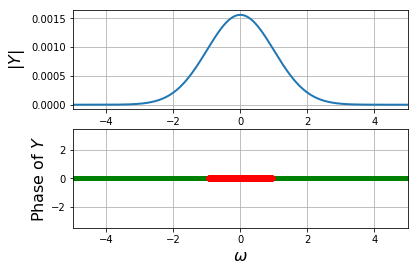

For N = 16384 and T = 3216.990877275948


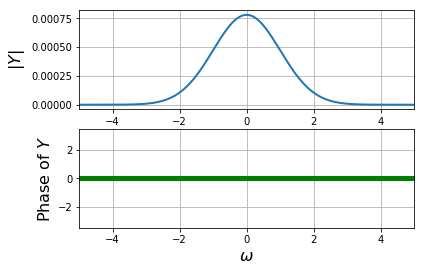

For N = 32768 and T = 6433.981754551896


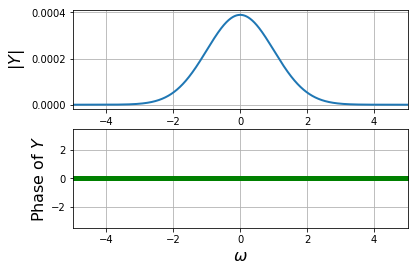

For N = 65536 and T = 12867.963509103793


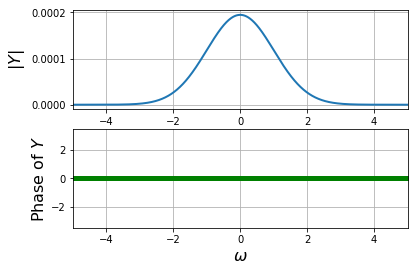

For N = 131072 and T = 25735.927018207585


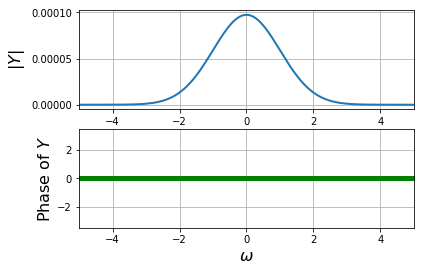

For N = 262144 and T = 51471.85403641517


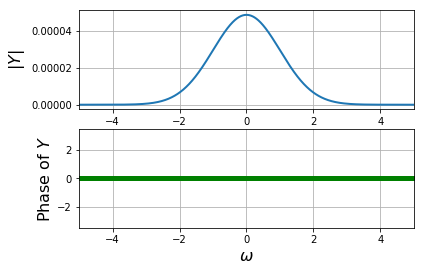

For N = 524288 and T = 102943.70807283034


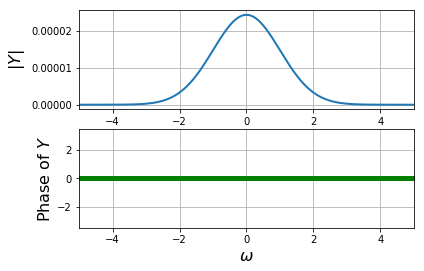

For N = 1048576 and T = 205887.41614566068


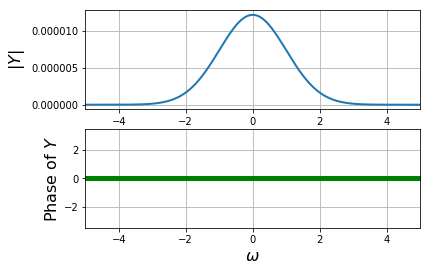

For N = 2097152 and T = 411774.83229132136


In [ ]:
N = 128
T = 8 * pi
err = 1
tol = 1e-6
yprevious = 0
while(err > tol):
    print('For N = '+str(N)+' and T = '+str(T))
    y = transform(func = lambda x : exp(-x**2/2), T = T, N = N, ret = True, c = T/(2*pi))
    err = sum(abs(y[::2]-yprevious))
    yprevious = y
    N = 2*N
    T = 2*T

print('Preferred Values are :')
print('N = '+str(N))
print('T = '+str(T))
print('True Error = '+str(err))
print('The original transform is:')
w = linspace(-N*(pi/T),N*(pi/T),N+1);w=w[:-1]
y = gaussian_transform(w)
subplot(2,1,1)
plot(w,abs(y),lw=2)
xlim([-5,5])
ylabel(r"$|Y|$",size=16)
grid(True)
subplot(2,1,2)
grid()
ylabel("Phase of Y",size=16)
plot(w,angle(y),'go',markersize= 3)
show()

# Conclusion
- From the above pairs of plots, it is clear that with a sufficiently large window size and sampling rate, the DFT approximates the CTFT of the gaussian.
- Sampling after windowing is done so that the DFT can be calculated using the Fast Fourier Transform. This is then a sampled version of the DTFT of the sampled time domain signal. With sufficiently large sampling rates, this approximates the CTFT of the original time domain signal.
- This process is done on the gaussian and the results are in agreement with what is expected